<img src="./img/vs265header.svg"/>


<h1 align="center">Lab 3 - Unsupervised Learning </h1> 
<h2 align="center"> Part 2 - Faces </h2>

In [1]:
%pylab inline
  
import matplotlib.animation as animation
import base64

import utils.anim as anim
import utils.lab3utils as util

faces = np.load('./data/yalefaces.npz')['faces'].T

Populating the interactive namespace from numpy and matplotlib


In [2]:
# WINDOWS USERS ONLY:
# the animations in this notebook generate small video files stored in the ./utils/ directory
# running this cell will clear those files for you.

# please run this cell right before turning in your problem set

#anim.clearFiles()

## Eigenfaces

The file `data/yalefaces.npz` is used in this problem. It contains a 3965x120 array. Each column contains an image of a face. You must reshape the 3965x1 column vector into a 61x65 matrix to make it an image. For example, to view the first 32 faces, run the code in the cell below.

**Handy JuPyter Tip**: You can single-click the area to the left of the output to switch between a fixed-size output and a scrolling output. You can also double-click the same area to collapse the output entirely. This is useful for situations like this one where you have an output that takes up a lot of screen real estate.

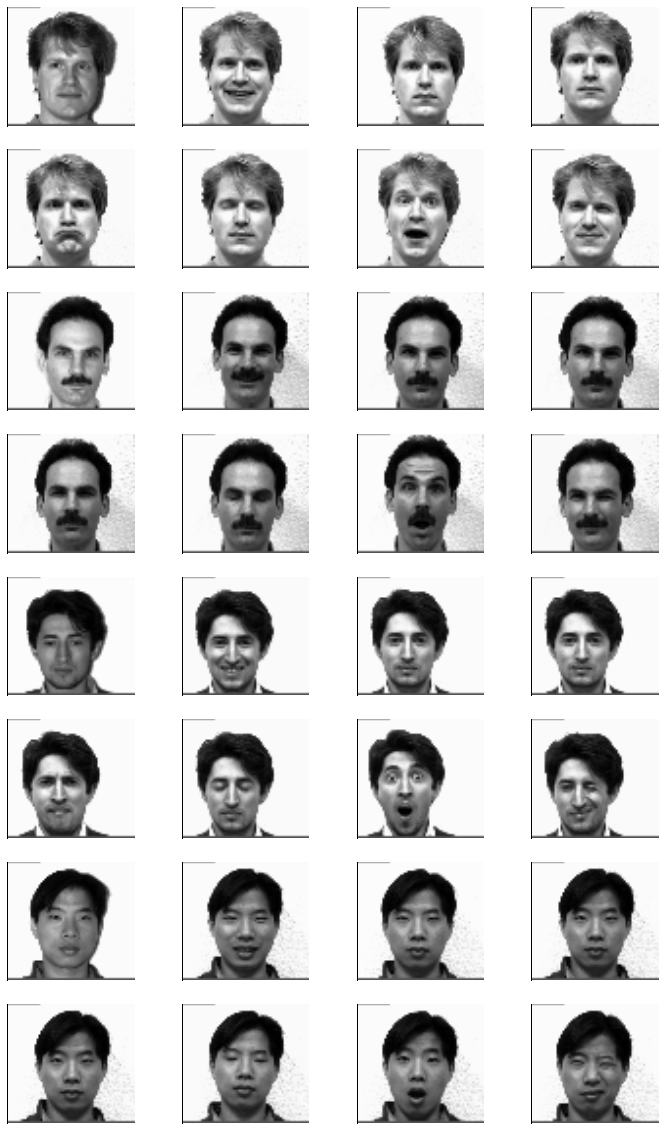

In [3]:
plt.figure(figsize=(12,20))

N = 32 #faces.shape[1] #<- uncomment to see the whole dataset at once

numCols = 4
numRows = N//numCols+((N%numCols)>0); #compute the grid shape from N

for i in range(N):
    faceColumn = faces[:,i]
    faceImage = util.faceReshape(faceColumn)
    
    plt.subplot(numRows,numCols,i+1)
    
    util.facePlot(faceImage)

### The Average Face

Compute the average face and take a look at it by plotting it with `util.facePlot`. The function `util.faceInitialize` below will subtract this face from the data before running `sangerLearn`. Why do we need to do this? (Hint: check out p201 of Hertz, Krogh, and Palmer).

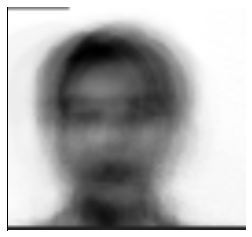

In [5]:
import numpy
averageFace = numpy.mean(faces, 1)
util.facePlot(util.faceReshape(averageFace));

Subtracting the mean centers the data, which is necessary for PCA

### Sanger's Rule for Faces

Use Sanger's Rule to learn the first four (or more if you like) principal components of the data (the so-called "eigenfaces"). Show what these look like. You should be able to use the exact same `sangerLearn` code from the first half of the problem set.

In [14]:
def sangerLearn(dataset,weights,learningRate):
    """
    Weight update with the Sanger rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
                                 
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForOjaLearn" list variable
    """
    
    output = weights.transpose() @ dataset
    numOutputs = output.shape[0]
    
#     residual = # YOUR CODE - what does the "residual" term start out as?
    # HINT: Sanger's rule for one neuron reduces to Oja's rule
    import numpy
    dw = np.zeros(weights.shape)
    ac = numpy.tril((output @ output.transpose())) #.transpose())
    dw = output @ dataset.transpose() - ac @ weights.transpose()
    
#     for i in range(numOutputs):
        
#         residual = # YOUR CODE - update the residual for neuron i in terms of the last residual
        
#         dw[:,i] = # YOUR CODE - calculate dw for neuron i
        
    weights += dw.transpose()*learningRate # update weight vector by dw
    
    return weights

In [33]:
numOutputs = 8 #how many PCs should we find?

learningRate = 1*10**-8 #decrease this value if you get a Warning: converting a masked element to nan.

faces, weights, learningRate = util.faceInitialize(faces,numOutputs=numOutputs,learningRate=learningRate)

In [34]:
numSteps = 10000 #needs to be made bigger when numOutputs (i.e. number of PCs to learn) is made bigger

for i in range(numSteps):
    weights = sangerLearn(faces,weights,learningRate) # this takes awhile!

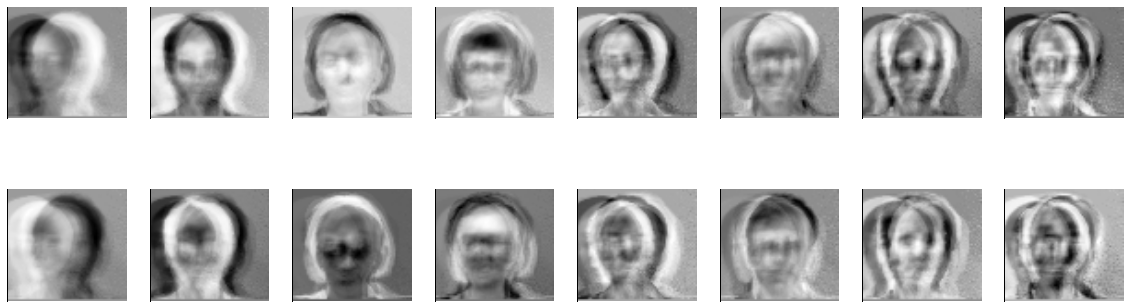

In [35]:
plt.figure(figsize=(20,6))

for i in range(numOutputs):
    plt.subplot(2,numOutputs,i+1)
    util.facePlot(util.faceReshape(weights[:,i]))
    plt.subplot(2,numOutputs,i+1+numOutputs)
    util.facePlot(-1*util.faceReshape(weights[:,i]))

You can view the axis of variation captured by each of the learned principal components using the code below. Simply change the index in the indicated line to change the eigenface that is animated.

In [18]:
numFrames = 300

#change the index in the following line:
vector,target = util.pickEigenvector(0,weights) #starting at 0

normalizingConstant = np.sqrt(np.sum(np.square(averageFace)))

figure = plt.figure(); 
imageHandle = util.facePlot(util.faceReshape(normalizingConstant*vector+averageFace))

eigAnim = animation.FuncAnimation(figure, util.eigenFrame, init_func=anim.init,interval=2,
                                    fargs=[imageHandle,vector,target,numFrames,averageFace,normalizingConstant], 
                                    frames=numFrames, 
                                    )

anim.display_animation(eigAnim,fps=75)

### Dimensionality Reduction

Plot each face as a point in the two-dimensional space spanned by the first two PCs.
We obtain the coordinates of those points by projecting the face onto those two PCs.

What would this projection look like for Gaussian data? Does the projection for this data look like that? What does this tell you about the data?

For gaussian data, the distribution alongs the two PCs should be linear. These aren't, so the faces aren't truely gaussian.

In [26]:
colorList = ['red','orange','yellow','blue','black','brown','gray',
             'skyblue','tomato','mediumspringgreen',
            'plum','darkcyan','indigo','darkolivegreen','hotpink']

numPoses = 8
numFaces = faces.shape[1]
numIndividuals = numFaces//numPoses #floor division

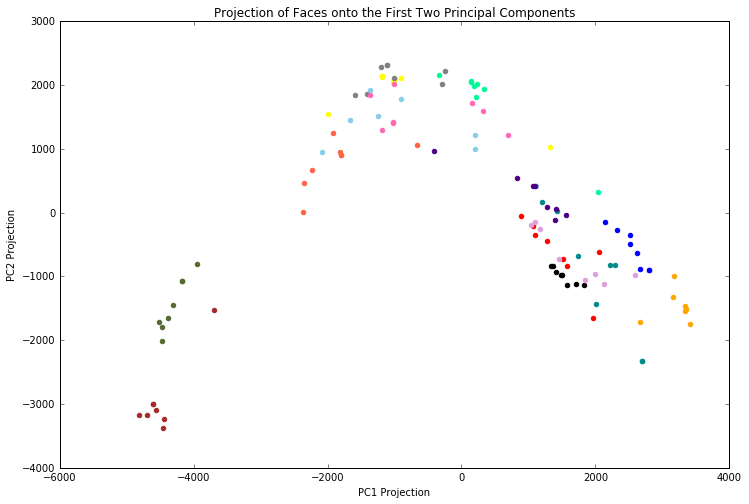

In [28]:
plt.figure(figsize=(12,8))

projectionVectors = weights[:, :2]

for i in range(numIndividuals):
    startIndex = i*numPoses; endIndex = startIndex+numPoses
    faceColumns = faces[:,startIndex:endIndex]
    projection = projectionVectors.transpose() @ faceColumns
    plt.scatter(projection[0,:],projection[1,:],color=colorList[i])

plt.title('Projection of Faces onto the First Two Principal Components')
plt.xlabel('PC1 Projection'); plt.ylabel('PC2 Projection');

### Reconstruction

Pick a face and show what the reconstructions look like as you reconstruct with progressively more principal components. Remember to add back in the mean face before you reconstruct. If the first face you pick doesn't work, try several different faces. If your reconstructions are bad, you might also want to go back and learn more PCs (say, 8).

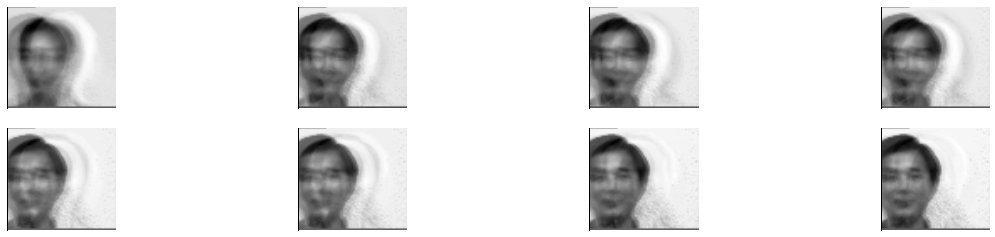

In [37]:
faceIndex = 42

faceColumn = faces[:,faceIndex,None] #keeps column shape

maxComponents = weights.shape[1]

plt.figure(figsize=(20,4))

for i in range(maxComponents):
    projectionVectors = weights[:, :(i + 1)]
    projection = projectionVectors.transpose() @ faceColumn
    
    #now, return to the coordinates in the full face-space by "up-projecting"
    reconstruction = projectionVectors @ projection + averageFace[:,None] 
    
    if maxComponents > 4:
        plt.subplot(2,maxComponents//2,i+1)
    else:
        plt.subplot(1,maxComponents,i+1)
    util.facePlot(util.faceReshape(reconstruction))

### Winner-Take-All Learning

Now train a WTA network on the faces data. You should experiment
with different numbers of units. Do the learned weight vectors appear any more
meaningful than those learned by PCA?

A side note for those familiar with the K-means algorithm: the WTA network learning
rule basically performs stochastic gradient descent on the same objective
function as K-means. See the discussion on page 222 of Hertz, Krogh, and Palmer.

Yes, it seems that the WTA mean vectors look more like individual faces. (if they converged) This 

In [38]:
def WTALearn(dataset,weights,learningRate):
    """
    Weight update with the WTA rule.
    weights and learningRate should be provided by output of initializeWTA()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
    """
    
    output = weights.transpose() @ dataset
    winnerIndices = numpy.argmax(output, 0)
    output = numpy.zeros(output.shape)
    for i in range(output.shape[1]):
        output[winnerIndices[i], i] = 1
    
    numOutputs = output.shape[0]
    
    dw = np.zeros(weights.shape)
    
    for i in range(output.shape[1]):
        thisOne = winnerIndices[i]
        dw[:, thisOne] += dataset[:, i] - weights[:, thisOne]
    
    weights += dw * learningRate
    
    return weights

In [42]:
numOutputs = 42; learningRate = 5*10**0

faces, weights, learningRate = util.faceInitialize(faces,numOutputs=numOutputs,learningRate=learningRate)

In [43]:
numSteps = 1000

for i in range(numSteps):
    weights = WTALearn(faces,weights,learningRate)

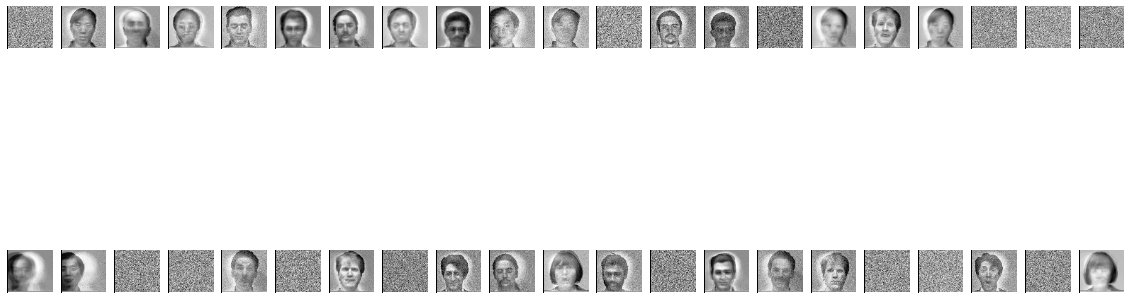

In [44]:
plt.figure(figsize=(20,8))

normalizingConstant = np.sqrt(np.sum(np.square(averageFace)))

for i in range(numOutputs):
    if numOutputs >= 8:
        plt.subplot(2,numOutputs//2+numOutputs%2,i+1)
    else:
        plt.subplot(1,numOutputs,i+1)
    util.facePlot(util.faceReshape(normalizingConstant*weights[:,i]+averageFace))